1 - Preparando o ambiente.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Reshape

2 - Importando o dataset.

In [ ]:
df = pd.read_csv("/home/creditcard (1).csv")

3 - Distribuição das variáveis.

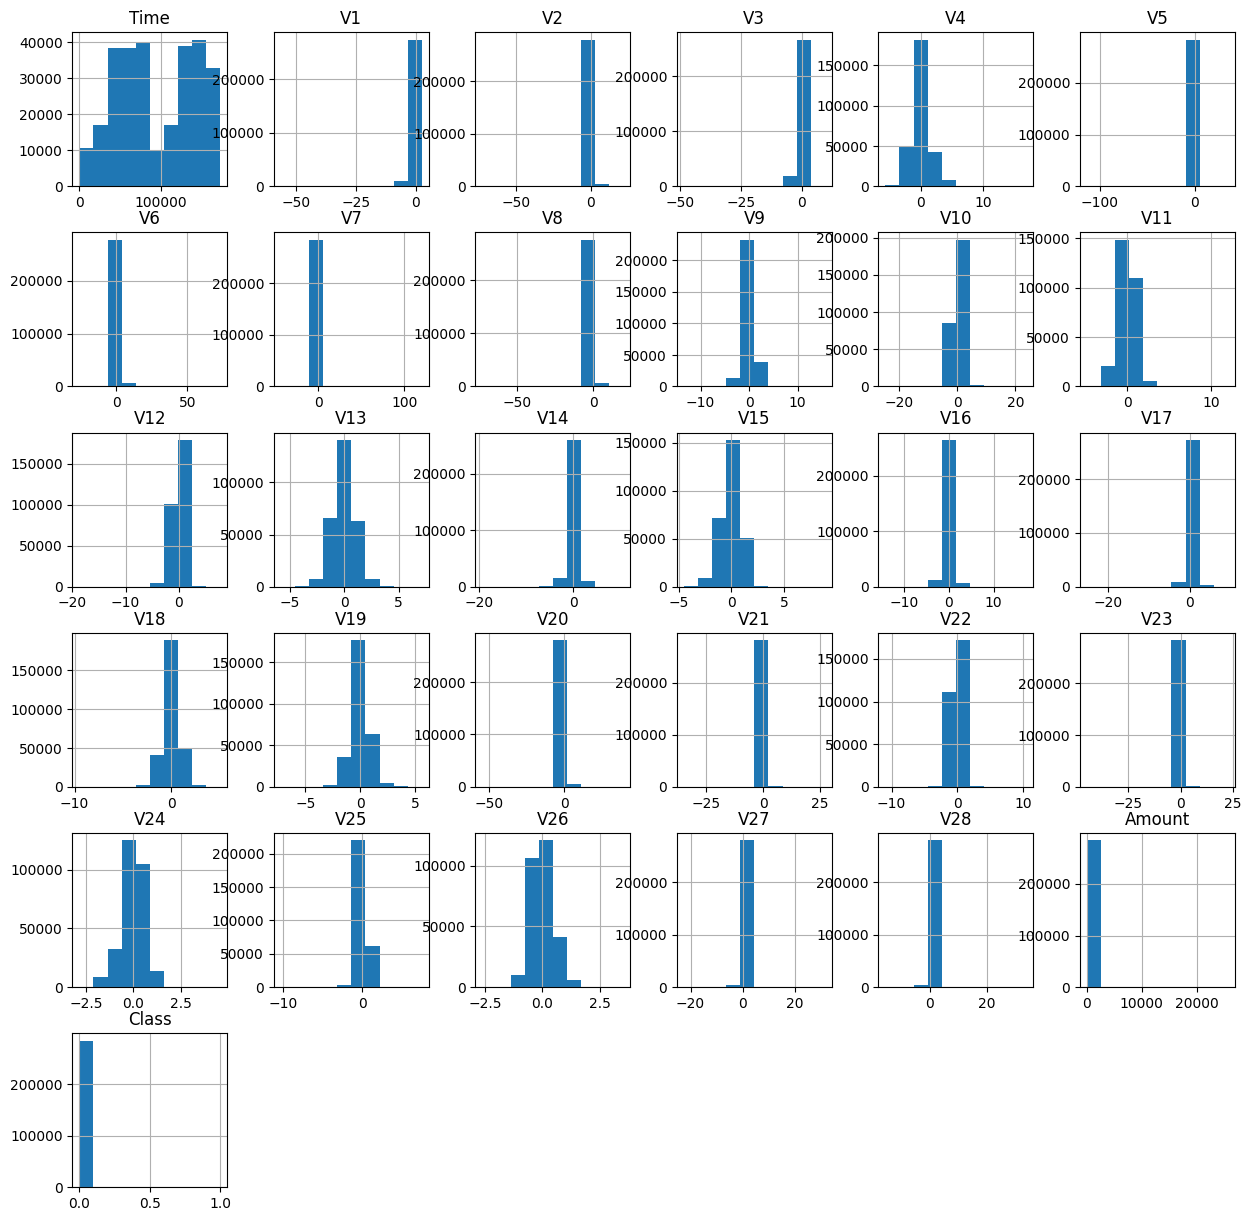

In [ ]:
df.hist(figsize=(15, 15))
plt.show()

4 - Separação dos dados de treino e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class", axis=1), df["Class"], test_size=0.25)

# Normalização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(213605, 30)

5 - Novo Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Ajustando a criação do modelo para Conv1D
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(30, 1)))  # Ajustado para 30 timesteps
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilando o modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Ajustando os dados para a forma correta
X_train_reshaped = X_train.reshape(-1, 30, 1)  # Agora corresponde ao input_shape

In [ ]:
# Treinando o modelo
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128)

Epoch 1/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9971 - loss: 0.0220
Epoch 2/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 3/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9993 - loss: 0.0036
Epoch 4/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 5/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 6/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9995 - loss: 0.0027
Epoch 7/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9994 - loss: 0.0027
Epoch 8/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9995 - loss: 0.0025
Epoch 9/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9994 - loss: 0.0028
Epoch 10/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9995 - loss: 0.0026


In [ ]:
# Avaliando o modelo
X_test_reshaped = X_test.reshape(-1, 30, 1)
score = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Acurácia: {score[1] * 100:.2f}%")

Acurácia: 99.93%


In [ ]:
# Salvando o modelo
model.save("modelo_marketing.h5")

In [ ]:
# Supondo que você armazene o histórico do treinamento na variável 'history' - Se você ainda não o fez, modifique a chamada model.fit para fazer isso:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

Epoch 1/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 2/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 3/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 4/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 5/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 6/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 7/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 8/10
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9995 - loss: 

<Figure size 640x480 with 0 Axes>

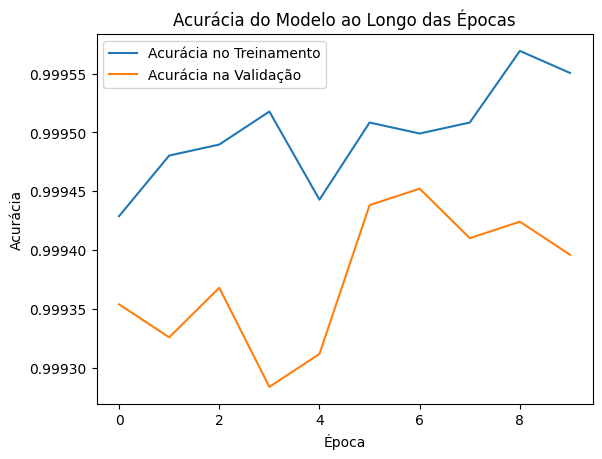

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotando a acurácia de treinamento e validação
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.title('Acurácia do Modelo ao Longo das Épocas')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

plt.figure()

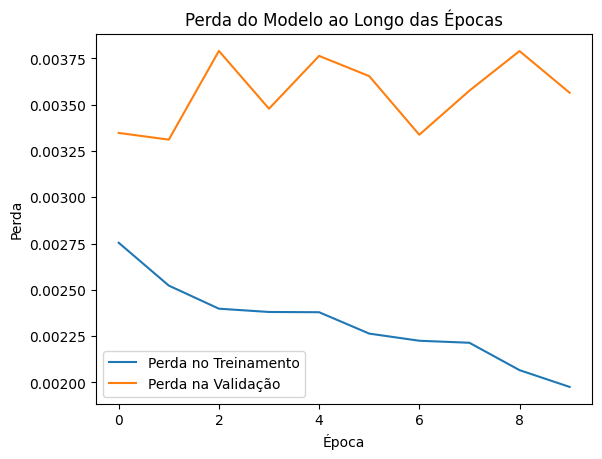

In [ ]:
# Plotando a perda de treinamento e validação
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Perda do Modelo ao Longo das Épocas')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.show()